# Descriptive Statistics

In [ ]:
%matplotlib inline

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import mtcars

from IPython.display import Image
from IPython.core.display import HTML 

In [58]:
mtcars.index = mtcars["name"] # Load Data

Descriptive statistics are measures that summarize important features of data, often with a single number. Producing descriptive statistics is a common first step to take after cleaning and preparing a data set for analysis. 

### The location

Measures of center are statistics that give us a sense of the "middle" of a numeric variable. In other words, centrality measures give you a sense of a typical value you'd expect to see.

#### Mean

In [60]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/4e3313161244f8ab61d897fb6e5fbf6647e1d5f5")

In [61]:
mtcars.mean() # Calculate the mean of each attribute

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [62]:
mtcars.mean(axis=1) # when selecting axis=1, this computes the mean of each row

name
Mazda RX4              29.907273
Mazda RX4 Wag          29.981364
Datsun 710             23.598182
Hornet 4 Drive         38.739545
Hornet Sportabout      53.664545
Valiant                35.049091
Duster 360             59.720000
Merc 240D              24.634545
Merc 230               27.233636
Merc 280               31.860000
Merc 280C              31.787273
Merc 450SE             46.430909
Merc 450SL             46.500000
Merc 450SLC            46.350000
Cadillac Fleetwood     66.232727
Lincoln Continental    66.058545
Chrysler Imperial      65.972273
Fiat 128               19.440909
Honda Civic            17.742273
Toyota Corolla         18.814091
Toyota Corona          24.888636
Dodge Challenger       47.240909
AMC Javelin            46.007727
Camaro Z28             58.752727
Pontiac Firebird       57.379545
Fiat X1-9              18.928636
Porsche 914-2          24.779091
Lotus Europa           24.880273
Ford Pantera L         60.971818
Ferrari Dino           34.508182
Maser

#### Median

In [63]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/8bb325861bbc61231c4c1364480f1fd920219071")

In [64]:
mtcars.median() # The median of the distribution is the value where 50% of the data lies below it and 50% lies above it.
                # The median split the data in half

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

#### Mean vs Median

The mean and median gives sense of the location of the data, however, they behave in different ways when exposed to extreme values: 
- **Mean:** The mean can be affected by heavy values
- **Median:** Always gives the middle of the distribution, and is not affected by extreme values

In a symmetric distribution, the Mean and the Median are the ***same***

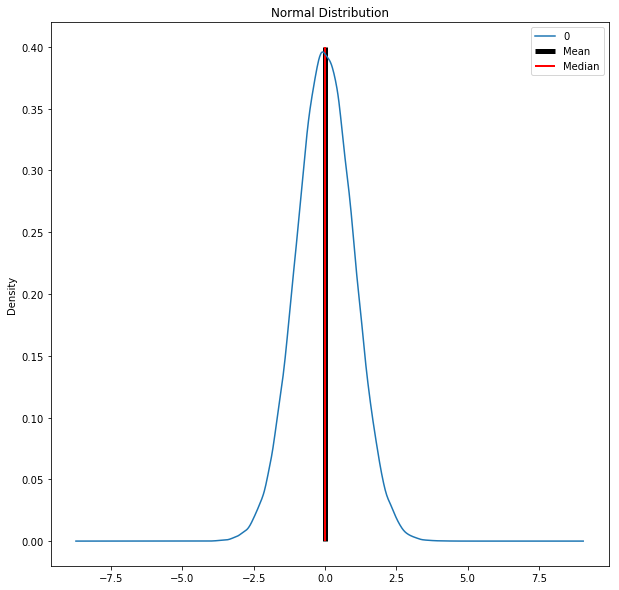

In [65]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density",
              figsize=(10,10), title='Normal Distribution')


plt.vlines(norm_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0, label='Mean')

plt.vlines(norm_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red", label='Median')
plt.legend()

In Skewed distribution, the mean tends to get pulled to the ***direction of the skew*** while the median ***resists to this pull***

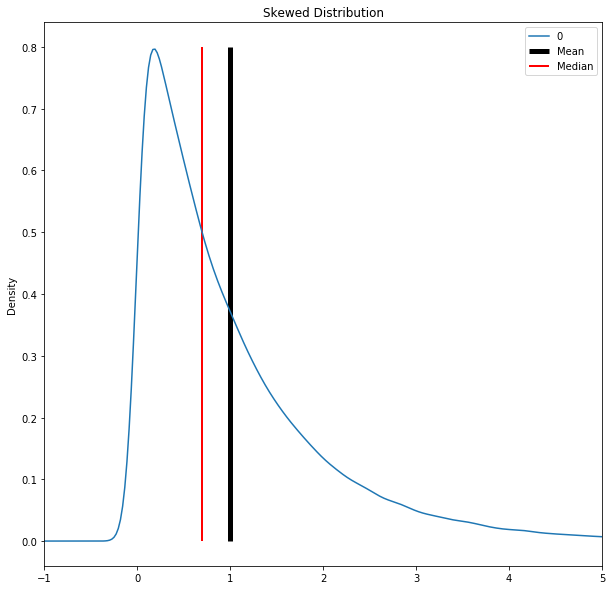

In [66]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-1,5), title='Skewed Distribution')


plt.vlines(skewed_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.8,
           linewidth=5.0, label='Mean')

plt.vlines(skewed_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.8, 
           linewidth=2.0,
           color="red", label='Median')
plt.legend()

In addition, the mean can be affected by ***outliers***

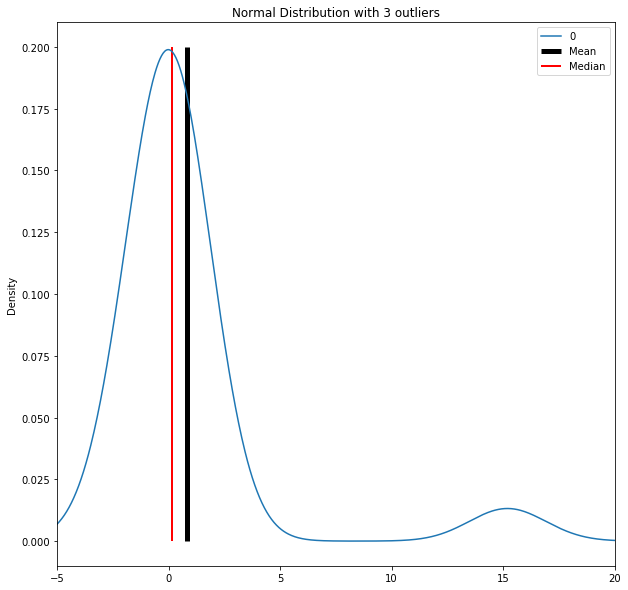

In [67]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-5,20), title='Normal Distribution with 3 outliers')


plt.vlines(combined_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0, label='Mean')

plt.vlines(combined_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="red", label='Median')
plt.legend()

#### Mode

The mode is a statistic that describes the value that appears most frequently.

In [74]:
mtcars.mode()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,NaN,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,NaN,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,NaN,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


in the table above, columns containing several modes they are all returned (ie: mpg), and columns with no mode the value returned is NaN

### The Spread

The Spread can be measured using different statistics to describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.

#### Range

Range is the distance between the maximum and minimum observations:

In [15]:
max(mtcars["mpg"]) - min(mtcars["mpg"])

23.5

As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function:

In [16]:
five_num = [mtcars["mpg"].quantile(0),   
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.50),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1)]

five_num

[10.4, 15.425, 19.2, 22.8, 33.9]

These five number summary are also returned when using df.describe

In [76]:
mtcars["mpg"].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

**Interquartile (IQR)** range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile:

In [77]:
mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25)

7.375

The boxplots are great visual representations of the five number summary and IQR:

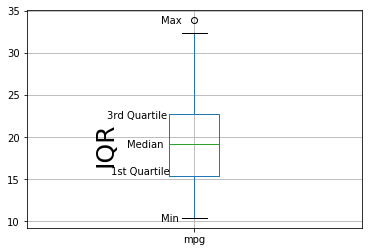

In [23]:
mtcars.boxplot(column="mpg",
               return_type='axes',
               figsize=(15,15))

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25)
plt.show()

#### Variance

Variance and standard deviation are two other common measures of spread. The variance of a distribution is the average of the squared deviations (differences) from the mean. Use df.var() to check variance:

In [78]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/55622d2a1cf5e46f2926ab389a8e3438edb53731")

In [24]:
mtcars["mpg"].var()

36.324102822580642

#### Standard Deviation

In [25]:
mtcars["mpg"].std()

6.0269480520891037

The rule of thumb says that the ***range is about four times the standard deviation*** (this is only applicable when the data is normally distributed). we take as example, the generated normal distribution to ilustrate the relationship between range and standard deviation

In [88]:
norm_data.std(), (norm_data.max()-norm_data.min())/4

(0.90216171185859917, 0.97574674247007964)

#### Median Absolute Deviation

Since variance and standard deviation are both derived from the mean, they are susceptible to the influence of data skew and outliers. The Median Absolute Deviation (MAD) is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median:

In [90]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/167bb7033067f9b85dd796980133463fad36d5c9")

In [89]:
abs_median_devs = abs(mtcars["mpg"] - mtcars["mpg"].median())

abs_median_devs.median() * 1.4826

5.411490000000001

*Note: The MAD is often multiplied by a scaling factor of 1.4826.

In [92]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/4b27da5f136ec46ecd2ba4dc2190cab5d6248c22")

### The Shape

Skewness measures the skew or asymmetry of a distribution while kurtosis measures the "peakedness" of a distribution. while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:


#### Skew

In [95]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/36efa5ee605f03d5491c847b95389cf5d35c75d7")

In [27]:
mtcars["mpg"].skew()  # Check skewness

0.67237713762908047

#### Kurtosis

In [96]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/290704160e73869560b319e953807596ece4c5c8")

*Note: The 3 in the formula represents the Kurtosis of normal distribution 

In [28]:
mtcars["mpg"].kurt()  # Check kurtosis

-0.0220062914240855

Following is dummy data that will be used to explore Skewness and Kurtosis of different distributions

In [93]:

norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

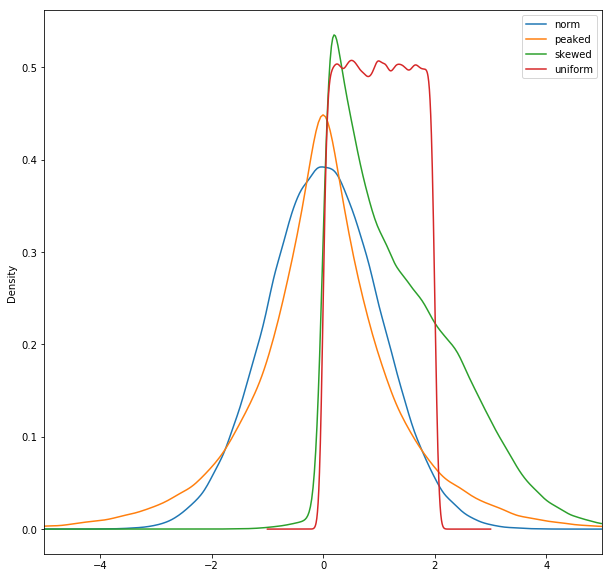

In [94]:
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5))


In [32]:
data_df.skew()

norm       0.005445
peaked     0.000500
skewed     0.988744
uniform   -0.000356
dtype: float64

In [34]:
data_df.kurt()

norm      -0.026358
peaked     2.885968
skewed     1.171101
uniform   -1.205988
dtype: float64

### Summary

Descriptive Statistics are a set of measurements used to inform about the characteristics of the data such as the center, the spread and the shape. Descriptive Statistics return numeric values that give more insights about the data that can be communicated to others. In addition, certain values, like the mean and variance, are used in all sorts of statistical tests and predictive models.